In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Reading Dataset

data = pd.read_csv('Financial Analytics data.csv')

In [3]:
# Taking look at the data by Top 10 rows

data.head(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
5,6,Hind. Unilever,288265.26,8590.00
6,7,Maruti Suzuki,263493.81,19283.20
7,8,Infosys,248320.35,17794.00
8,9,O N G C,239981.50,22995.88
9,10,St Bk of India,232763.33,57014.08


In [4]:
# The shape of the dataframe

data.shape

(488, 4)

In [5]:
# The index of the dataframe

data.index

RangeIndex(start=0, stop=488, step=1)

In [6]:
# The column names used

data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [7]:
# Assign all columns to a variable list

column = list(data)
print(column)

['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore']


In [8]:
# Copying the dataset into another variable, to use and make changes, by not affecting the original dataset

capdata = data.copy()
print(capdata)

     S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore
0        1   Reliance Inds.        583436.72           99810.00
1        2              TCS        563709.84           30904.00
2        3        HDFC Bank        482953.59           20581.27
3        4              ITC        320985.27            9772.02
4        5          H D F C        289497.37           16840.51
..     ...              ...              ...                ...
483    496  Lak. Vilas Bank          3029.57             790.17
484    497            NOCIL          3026.26             249.27
485    498    Orient Cement          3024.32             511.53
486    499  Natl.Fertilizer          3017.07            2840.75
487    500        L T Foods              NaN                NaN

[488 rows x 4 columns]


In [9]:
# Removig irrelevant columns

col = ['S.No.',]
dropcol = capdata.drop(col, axis=1,inplace=True)

In [10]:
# Getting the top rows after dropping the irrelavent columns

capdata.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [11]:
# Check null values

capdata.isnull().sum()

Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

In [12]:
# Replace null values when 'Sales Qtr - Crore' is null with is null and 'Mar Cap - Crore'is not null

mask = (capdata['Sales Qtr - Crore']).isnull() & (capdata['Mar Cap - Crore']).notnull()

capdata.loc[mask,['Sales Qtr - Crore']] = 0


In [13]:
# Check null values after replacing sales-qtr with 0

capdata.isnull().sum()

Name                 0
Mar Cap - Crore      9
Sales Qtr - Crore    9
dtype: int64

In [14]:
# Check shape

capdata.shape

(488, 3)

In [15]:
# Drop code where both 'Mar Cap - Crore', 'Sales Qtr - Crore' is null

capdata.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'],how='all',inplace=True)

In [16]:
capdata.shape

(479, 3)

In [17]:
capdata.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [18]:
# Check Duplicates

duplicate = capdata.duplicated()
print(duplicate)

0      False
1      False
2      False
3      False
4      False
       ...  
482    False
483    False
484    False
485    False
486    False
Length: 479, dtype: bool


In [19]:
# Display entire information of the dataframe

capdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 486
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               479 non-null    object 
 1   Mar Cap - Crore    479 non-null    float64
 2   Sales Qtr - Crore  479 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.0+ KB


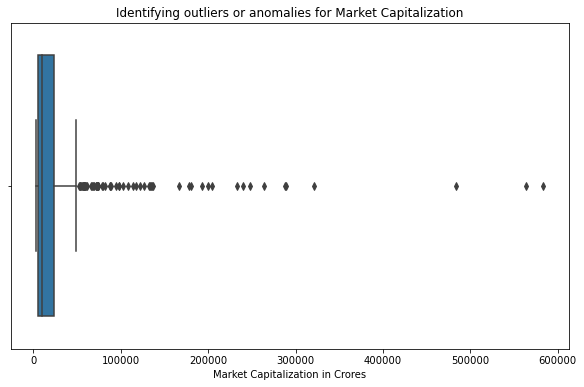

In [20]:
# Identifying outliers or anomalies in the data for Market Capitalization
plt.figure(figsize=(10,6))
sns.boxplot(data=capdata, x='Mar Cap - Crore')
plt.title('Identifying outliers or anomalies for Market Capitalization')
plt.xlabel('Market Capitalization in Crores')
plt.show()

In [21]:
# Removing Anomalies for Market Capitalization data

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = capdata['Mar Cap - Crore'].quantile(0.25)
Q3 = capdata['Mar Cap - Crore'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3-Q1

# Calculatethe lower and upper bounds to identify outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

# Remove outliers

capdata1 = capdata[( capdata['Mar Cap - Crore'] >= lower_bound )&(capdata['Mar Cap - Crore'] <= upper_bound )]

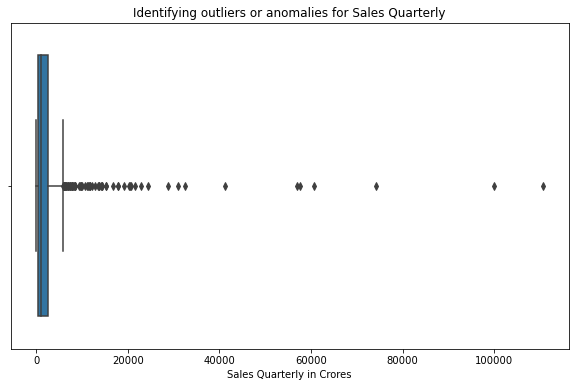

In [22]:
# Identifying outliers or anomalies in the data for Sales Quarterly
plt.figure(figsize=(10,6))
sns.boxplot(data=capdata, x='Sales Qtr - Crore')
plt.title('Identifying outliers or anomalies for Sales Quarterly')
plt.xlabel('Sales Quarterly in Crores')
plt.show()

In [23]:
# Removing Anomalies for Sales Quarterly data

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = capdata['Sales Qtr - Crore'].quantile(0.25)
Q3 = capdata['Sales Qtr - Crore'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3-Q1

# Calculatethe lower and upper bounds to identify outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

# Remove outliers

capdata2 = capdata[(capdata['Sales Qtr - Crore'] >= lower_bound )&(capdata['Sales Qtr - Crore'] <= upper_bound )]

In [24]:
print(capdata.shape)
print(capdata1.shape)
print(capdata2.shape)

(479, 3)
(416, 3)
(413, 3)


Mean: 11820.17
Meadian: 7814.23
Standard Deviation: 10028.58
Maximum: 48621.37
Minumum: 3017.07
Range: 45604.3
Quartiles:
0.25     4444.2775
0.50     7814.2350
0.75    15232.2750
Name: Mar Cap - Crore, dtype: float64


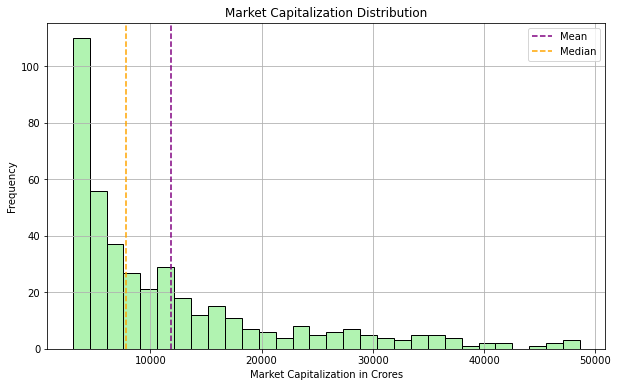

In [25]:
# Finding Mean, Meadian, Standard Deviation, Maximum, Minumum, Range and of Market Capitalization

mar_mean = round(capdata1['Mar Cap - Crore'].mean(),2)
mar_median = round(capdata1['Mar Cap - Crore'].median(),2)
mar_std = round(capdata1['Mar Cap - Crore'].std(),2)
mar_max = round(capdata1['Mar Cap - Crore'].max(),2)
mar_min = round(capdata1['Mar Cap - Crore'].min(),2)
mar_range = mar_max-mar_min
mar_quartiles = capdata1['Mar Cap - Crore'].quantile([0.25,0.5,0.75])

print('Mean:',mar_mean)
print('Meadian:',mar_median)
print('Standard Deviation:',mar_std)
print('Maximum:',mar_max)
print('Minumum:',mar_min)
print('Range:',mar_range)
print('Quartiles:')
print(mar_quartiles)

# Plotting Histogram

plt.figure(figsize=(10,6))
sns.histplot(data=capdata1['Mar Cap - Crore'],bins=30,color='lightgreen',alpha=0.7)
plt.axvline(mar_mean, color = 'Purple',linestyle='--',label='Mean')
plt.axvline(mar_median,color='Orange',linestyle='--',label='Median')
plt.title('Market Capitalization Distribution')
plt.xlabel('Market Capitalization in Crores')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Mean: 1254.98
Meadian: 793.76
Standard Deviation: 1207.15
Maximum: 5861.04
Minumum: 0.0
Range: 5861.04
Quartiles:
0.25     431.21
0.50     793.76
0.75    1682.97
Name: Sales Qtr - Crore, dtype: float64


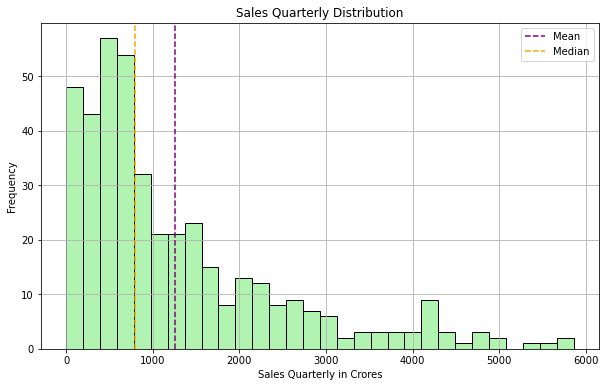

In [26]:
# Finding Mean, Meadian, Standard Deviation, Maximum, Minumum, Range and of Sales Quarterly

sales_mean = round(capdata2['Sales Qtr - Crore'].mean(),2)
sales_median = round(capdata2['Sales Qtr - Crore'].median(),2)
sales_std = round(capdata2['Sales Qtr - Crore'].std(),2)
sales_max = round(capdata2['Sales Qtr - Crore'].max(),2)
sales_min = round(capdata2['Sales Qtr - Crore'].min(),2)
sales_range = sales_max-sales_min
sales_quartiles = capdata2['Sales Qtr - Crore'].quantile([0.25,0.5,0.75])

print('Mean:',sales_mean)
print('Meadian:',sales_median)
print('Standard Deviation:',sales_std)
print('Maximum:',sales_max)
print('Minumum:',sales_min)
print('Range:',sales_range)
print('Quartiles:')
print(sales_quartiles)

# Plotting Histogram

plt.figure(figsize=(10,6))
sns.histplot(data=capdata2['Sales Qtr - Crore'],bins=30,color='lightgreen',alpha=0.7)
plt.axvline(sales_mean, color = 'Purple',linestyle='--',label='Mean')
plt.axvline(sales_median,color='Orange',linestyle='--',label='Median')
plt.title('Sales Quarterly Distribution')
plt.xlabel('Sales Quarterly in Crores')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Pearson Co-efficient: 0.44508233223432003
Spearman Co-efficient: 0.49029853632709747


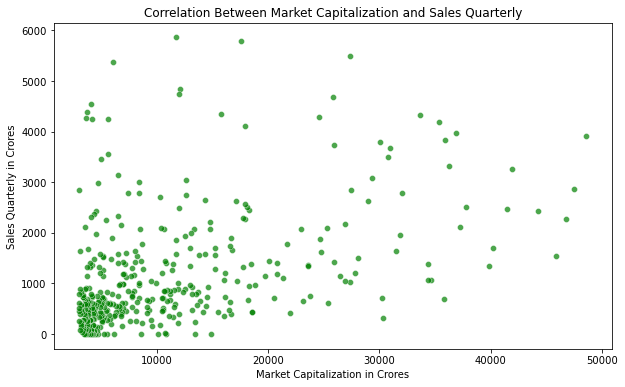

In [27]:
# Finding correlation between Market Capitalization and Sales Quarterly

market_capitalization = capdata1['Mar Cap - Crore']
sales_quarterly = capdata2['Sales Qtr - Crore']

# Using Pearson and Spearman Methods

corr1 = market_capitalization.corr(sales_quarterly, method = 'pearson')
corr2 = market_capitalization.corr(sales_quarterly, method = 'spearman')

# Printing the values
print('Pearson Co-efficient:',corr1)
print('Spearman Co-efficient:',corr2)

# Plotting Scatter-plot

plt.figure(figsize=(10,6))
sns.scatterplot(x=market_capitalization,y=sales_quarterly,color='green', alpha=0.7)
plt.title('Correlation Between Market Capitalization and Sales Quarterly')
plt.xlabel('Market Capitalization in Crores')
plt.ylabel('Sales Quarterly in Crores')
plt.show()

**Insights**

**Market Capitalization**

* The mean market capitalization for companies in the dataset is approximately 11,820.17 crores, while the median is 7,814.23 crores. This suggests that the distribution of market capitalization values is slightly right-skewed, with the mean being greater than the median. It indicates that there are companies with relatively higher market capitalizations that are influencing the mean.
* The standard deviation of 10,028.58 crores indicates that there is significant diversity in market capitalization among the companies in the dataset. Some companies may have market capitalizations significantly higher or lower than the average.
* The range of market capitalization is 45,604.3 crores. This indicates the extent of variation in market capitalization among companies, ranging from relatively small to large market values.
* The first quartile (25th percentile) at 4,444.28 crores indicates that 25% of the companies have market capitalizations below this value, representing relatively smaller companies in terms of market value. The third quartile (75th percentile) at 15,232.28 crores shows that 75% of the companies have market capitalizations below this value, indicating the range within which the majority of companies fall.

**Sales Quarterly**

* The mean quarterly sales for companies in the dataset is approximately 1254.98 crores, while the median is 793.76 crores. This indicates that the distribution of quarterly sales values is slightly right-skewed, with the mean being greater than the median. It suggests that there are some companies with relatively higher sales figures that are pulling the mean upwards.
* The standard deviation of 1207.15 crores, suggests that there is a considerable spread in the sales performance of companies and Some companies may have sales figures significantly higher or lower than the average.
* The range of quarterly sales is 5861.04 crores. This indicates the extent of variation in sales performance among companies in the dataset, ranging from no sales to significant revenue generation.
* TThe first quartile (25th percentile) at 431.21 crores indicates that 25% of the companies have quarterly sales below this value, representing relatively lower sales performers. The third quartile (75th percentile) at 1682.97 crores shows that 75% of the companies have quarterly sales below this value, indicating the range within which the majority of companies fall.

**Correlation between Market Capitalization and Sales Quarterly**

* The Pearson coefficient of 0.445 suggests a moderate positive linear relationship between market capitalization and quarterly sales. This indicates that as market capitalization increases, there is a tendency for quarterly sales to increase as well, although the relationship is not extremely strong.
* With a Spearman coefficient of 0.490, there is a moderate positive relationship between market capitalization and quarterly sales. This implies that as market capitalization increases, there is a tendency for quarterly sales to increase as well, although the relationship may not strictly follow a linear pattern.
* Both coefficients indicate a positive relationship between market capitalization and quarterly sales, suggesting that companies with higher market capitalizations tend to have higher quarterly sales. However, the strength of the relationship is moderate rather than strong, indicating that other factors beyond market capitalization also influence sales performance.


